# Ames IA Home Price Prediction

## Data Modeling & Evaluation (3/3)

## Contents
- [Data Import](#Data-Import)
- [Data Modeling](#Data-Modeling)
    - Model 1: Build a Linear Regression model, using column features that have a correlation coefficient equal to or greater than 0.5/-0.5 with `saleprice`
    - Model 2: Build a Linear Regression model, using column features that have a correlation coefficient equal to or greater than 0.25/-0.25 with `saleprice`
    - Model 3: Build a Linear Regression model, using column features that have a correlation coefficient equal to or greater than 0.15/-0.15 with `saleprice`
    - Model 4: Build a Lasso model (scaled and unscaled), using column features that have a correlation coefficient equal to or greater than 0.15/-0.15 with `saleprice`
    - Model 5: Build a Ridge model (scaled and unscaled), using column features that have a correlation coefficient equal to or greater than 0.15/-0.15 with `saleprice`
- [Evaluation](#Evaluation)
- [Conclusion & Recommendations](#Conclusion-&-Recommendations)

## Data Import

### All libraries

In [1]:
# Imports: 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Change the option to display with no max 
# Reference: (https://kakakakakku.hatenablog.com/entry/2021/04/19/090229)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Read in the data

In [3]:
# Import cleaned datasets
df_train = pd.read_csv('../data/v3_train_eda_completed.csv')
df_train.head()

,id,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,land_contour_HLS,land_contour_Low,land_contour_Lvl,utilities_NoSeWa,utilities_NoSewr,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,land_slope_Mod,land_slope_Sev,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_CompShg,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,exter_qual_Fa,exter_qual_Gd,exter_qual_TA,exter_cond_Fa,exter_cond_Gd,exter_cond_Po,exter_cond_TA,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmt_qual_Ex,bsmt_qual_Fa,bsmt_qual_Gd,bsmt_qual_Po,bsmt_qual_TA,bsmt_cond_Ex,bsmt_cond_Fa,bsmt_cond_Gd,bsmt_cond_Po,bsmt_cond_TA,bsmt_exposure_Av,bsmt_exposure_Gd,bsmt_exposure_Mn,bsmt_exposure_No,bsmtfin_type_1_ALQ,bsmtfin_type_1_BLQ,bsmtfin_type_1_GLQ,bsmtfin_type_1_LwQ,bsmtfin_type_1_Rec,bsmtfin_type_1_Unf,bsmtfin_type_2_ALQ,bsmtfin_type_2_BLQ,bsmtfin_type_2_GLQ,bsmtfin_type_2_LwQ,bsmtfin_type_2_Rec,bsmtfin_type_2_Unf,heating_GasW,heating_Grav,heating_OthW,heating_Wall,heating_qc_Fa,heating_qc_Gd,heating_qc_Po,heating_qc_TA,central_air_Y,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sal,functional_Sev,functional_Typ,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_finish_Fin,garage_finish_RFn,garage_finish_Unf,garage_qual_Ex,garage_qual_Fa,garage_qual_Gd,garage_qual_Po,garage_qual_TA,garage_cond_Ex,garage_cond_Fa,garage_cond_Gd,garage_cond_Po,garage_cond_TA,paved_drive_P,paved_drive_Y,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_Co

In [4]:
df_train.shape

(2051, 249)

In [5]:
# Import test dataset
df_test = pd.read_csv('../data/v3_test_eda_completed.csv')
df_test.head()

,id,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,land_contour_HLS,land_contour_Low,land_contour_Lvl,utilities_NoSewr,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,land_slope_Mod,land_slope_Sev,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Norm,condition_2_PosA,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_Metal,roof_matl_Roll,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_PreCast,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Other,exterior_2nd_Plywood,exterior_2nd_PreCast,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_CBlock,mas_vnr_type_None,mas_vnr_type_Stone,exter_qual_Fa,exter_qual_Gd,exter_qual_TA,exter_cond_Fa,exter_cond_Gd,exter_cond_Po,exter_cond_TA,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmt_qual_Ex,bsmt_qual_Fa,bsmt_qual_Gd,bsmt_qual_Po,bsmt_qual_TA,bsmt_cond_Fa,bsmt_cond_Gd,bsmt_cond_TA,bsmt_exposure_Av,bsmt_exposure_Gd,bsmt_exposure_Mn,bsmt_exposure_No,bsmtfin_type_1_ALQ,bsmtfin_type_1_BLQ,bsmtfin_type_1_GLQ,bsmtfin_type_1_LwQ,bsmtfin_type_1_Rec,bsmtfin_type_1_Unf,bsmtfin_type_2_ALQ,bsmtfin_type_2_BLQ,bsmtfin_type_2_GLQ,bsmtfin_type_2_LwQ,bsmtfin_type_2_Rec,bsmtfin_type_2_Unf,heating_GasA,heating_GasW,heating_Grav,heating_qc_Fa,heating_qc_Gd,heating_qc_TA,central_air_Y,electrical_FuseA,electrical_FuseF,electrical_FuseP,electrical_SBrkr,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_Po,kitchen_qual_TA,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Typ,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_finish_Fin,garage_finish_RFn,garage_finish_Unf,garage_qual_Fa,garage_qual_Gd,garage_qual_Po,garage_qual_TA,garage_cond_Ex,garage_cond_Fa,garage_cond_Gd,garage_cond_Po,garage_cond_TA,paved_drive_P,paved_drive_Y,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,home_size,age_cond,upgrades,total_bath,total_outdoor_space
0,2658,190,69.0,9142,6,8,1910,1950,0.0,0,0,1020,1020,908,1020,0,1928,0,0,2,0,4,2,9,0,1910.0,1,440,0,60,112,0,0,0,0,4,2006,0,0,0,0,1,1,0,0,

In [6]:
df_test.shape

(878, 234)


## Data Modeling

### (Model 1): Column features that have a correlation coefficient equal to or greater than 0.5/-0.5 with `saleprice`

The first linear regression model was built by using features that have a correlation coefficient equal or greater than 0.5/-0.5 with `saleprice`. This model achieved an R-squared of 82.1% in training data and 89.5% in test data, which seems to generalize well to unseen data. Also, RMSE value indicated that, on average, the model's predicted values are off by approximately $24,242. Additionally, a range of cross-validation score was between 0.74-0.88, suggesting that there is some variability in the scores. Overall, this model is a good start but additional areas should be explored to improve the model.

In [7]:
# Create a correlation between all variabvles and 'saleprice'
df_train_corr = df_train.corr()[['saleprice']].sort_values(by='saleprice', 
                                                           ascending=False)

# Select dependent variables that have a correlation coefficients of r < -0.5 of r > 0.5 'saleprice'
df_train_corr_50 = df_train_corr.loc[
    (df_train_corr['saleprice'] >= 0.50) | (df_train_corr['saleprice'] <= -0.50)]

# Display columns 
df_train_corr_50.index

Index(['saleprice', 'overall_qual', 'home_size', 'gr_liv_area', 'garage_area',
       'garage_cars', 'total_bsmt_sf', '1st_flr_sf', 'total_bath',
       'bsmt_qual_Ex', 'age_cond', 'year_built', 'upgrades', 'year_remod/add',
       'full_bath', 'foundation_PConc', 'garage_yr_blt', 'totrms_abvgrd',
       'mas_vnr_area', 'kitchen_qual_TA', 'exter_qual_TA'],
      dtype='object')

In [8]:
# Create X and y
X = df_train[['overall_qual', 'home_size', 'gr_liv_area', 'garage_area',
       'garage_cars', 'total_bsmt_sf', '1st_flr_sf', 'total_bath',
       'bsmt_qual_Ex', 'age_cond', 'year_built', 'upgrades', 'year_remod/add',
       'full_bath', 'foundation_PConc', 'garage_yr_blt', 'totrms_abvgrd',
       'mas_vnr_area', 'kitchen_qual_TA', 'exter_qual_TA']]
y = df_train['saleprice']

In [9]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=123)

In [10]:
#Instantiate and fit the model
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [11]:
# Calculate r2 score
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

# Predict the values using test data 
test_preds = lr.predict(X_test)
# Calculate root mean squared error (RMSE) - Test
rmse = np.sqrt(mean_squared_error(y_test, test_preds))

# Cross Validation
scores = cross_val_score(lr, X, y, cv=5)

print(f"Model 1 - OLS")
print(f"Column features that have a correlation coefficient equal to or greater than 0.5/-0.58 with saleprice")
print(f"----------")
print(f"Training R-Squared Score: {round(train_score, 3)}")
print(f"Test R-Squared Score: {round(test_score, 3)}")
print(f"RMSE: {round(rmse, 3)}")
print(f"Cross-Validation Score: {scores}")

Model 1 - OLS
Column features that have a correlation coefficient equal to or greater than 0.5/-0.58 with saleprice
----------
Training R-Squared Score: 0.822
Test R-Squared Score: 0.894
RMSE: 24249.874
Cross-Validation Score: [0.83885065 0.87857168 0.74764099 0.86567608 0.78214415]


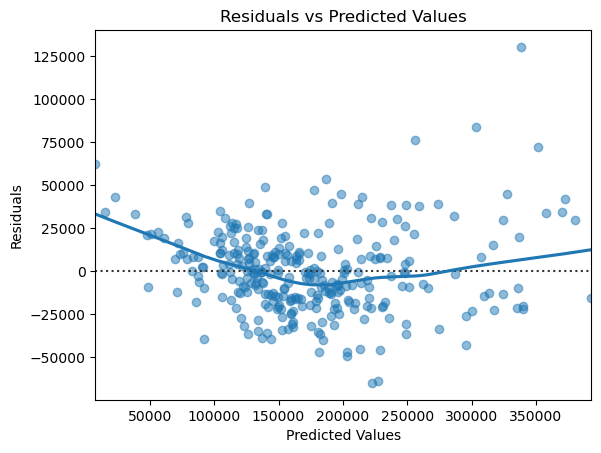

In [12]:
# Calculate residuals 
residuals = y_test - test_preds

# Plot residuals against predicted values 
sns.residplot(x=test_preds, y=residuals, lowess=True, scatter_kws={'alpha': 0.5})
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals');

In [13]:
# Make saleprice predictions on homes that were in test.csv
preds = lr.predict(df_test[['overall_qual', 'home_size', 'gr_liv_area', 'garage_area',
       'garage_cars', 'total_bsmt_sf', '1st_flr_sf', 'total_bath',
       'bsmt_qual_Ex', 'age_cond', 'year_built', 'upgrades', 'year_remod/add',
       'full_bath', 'foundation_PConc', 'garage_yr_blt', 'totrms_abvgrd',
       'mas_vnr_area', 'kitchen_qual_TA', 'exter_qual_TA']])

# Create saleprice colum in df_test
df_test['saleprice'] = preds

# Create dataframe with only ID and saleprice columns from df_test
lr_submission_v1 = df_test[['id', 'saleprice']]

# Set Index to Id
lr_submission_v1.set_index('id', inplace=True) 

# Save submission
lr_submission_v1.to_csv('../submission/mlr_submission_v1.csv')

### [Model 2]: Column features that have a correlation coefficient equal to or greater than 0.25/-0.25 with `saleprice`

The second model used a larger set of features, including those that have a correlation coefficient equal or greater than 0.25/-0.25 with `saleprice`. This model achieved a higher R-squared score of 86.8% in training data and 90.4% in test data. Also, RMSE value of $23,089 is lower than RMSE in the first model. The cross-validation scores range from 0.78 to 0.89, suggesting that the model is consistent in its performance. 

In [14]:
#  Select columns that have equal or more than 25%/25% correlation to 'saleprice'
df_train_corr_25 = df_train_corr.loc[
    (df_train_corr['saleprice'] >= 0.25) | (df_train_corr['saleprice'] <= -0.25)]

# Create features matrix (X) and target vector (y)
df_train_corr_25.index

Index(['saleprice', 'overall_qual', 'home_size', 'gr_liv_area', 'garage_area',
       'garage_cars', 'total_bsmt_sf', '1st_flr_sf', 'total_bath',
       'bsmt_qual_Ex', 'age_cond', 'year_built', 'upgrades', 'year_remod/add',
       'full_bath', 'foundation_PConc', 'garage_yr_blt', 'totrms_abvgrd',
       'mas_vnr_area', 'fireplaces', 'bsmtfin_type_1_GLQ',
       'neighborhood_NridgHt', 'exter_qual_Gd', 'bsmtfin_sf_1',
       'garage_finish_Fin', 'total_outdoor_space', 'bsmt_exposure_Gd',
       'sale_type_New', 'garage_type_Attchd', 'exterior_1st_VinylSd',
       'exterior_2nd_VinylSd', 'open_porch_sf', 'wood_deck_sf', 'lot_frontage',
       'mas_vnr_type_Stone', 'kitchen_qual_Gd', 'lot_area', 'paved_drive_Y',
       'bsmt_full_bath', 'half_bath', 'central_air_Y', 'garage_cond_TA',
       'roof_style_Hip', 'neighborhood_NoRidge', 'mas_vnr_type_BrkFace',
       'neighborhood_StoneBr', 'electrical_SBrkr', 'ms_zoning_RM',
       'bsmt_exposure_No', 'lot_shape_Reg', 'heating_qc_TA',
      

In [15]:
# Create X and y
X = df_train[['overall_qual', 'home_size', 'gr_liv_area', 'garage_area',
       'garage_cars', 'total_bsmt_sf', '1st_flr_sf', 'total_bath',
       'bsmt_qual_Ex', 'age_cond', 'year_built', 'upgrades', 'year_remod/add',
       'full_bath', 'foundation_PConc', 'garage_yr_blt', 'totrms_abvgrd',
       'mas_vnr_area', 'fireplaces', 'bsmtfin_type_1_GLQ',
       'neighborhood_NridgHt', 'exter_qual_Gd', 'bsmtfin_sf_1',
       'garage_finish_Fin', 'total_outdoor_space', 'bsmt_exposure_Gd',
       'sale_type_New', 'garage_type_Attchd', 'exterior_1st_VinylSd',
       'exterior_2nd_VinylSd', 'open_porch_sf', 'wood_deck_sf', 'lot_frontage',
       'mas_vnr_type_Stone', 'kitchen_qual_Gd', 'lot_area', 'paved_drive_Y',
       'bsmt_full_bath', 'half_bath', 'central_air_Y', 'garage_cond_TA',
       'roof_style_Hip', 'neighborhood_NoRidge', 'mas_vnr_type_BrkFace',
       'neighborhood_StoneBr', 'electrical_SBrkr', 'ms_zoning_RM',
       'bsmt_exposure_No', 'lot_shape_Reg', 'heating_qc_TA',
       'foundation_CBlock', 'garage_type_Detchd', 'mas_vnr_type_None',
       'garage_finish_Unf', 'bsmt_qual_TA', 'kitchen_qual_TA',
       'exter_qual_TA']]
y = df_train['saleprice']

In [16]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.15, 
                                                    random_state=123)


In [17]:
#Instantiate and fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
# Calculate r2 score
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

# Predict the values using test data 
test_preds = lr.predict(X_test)
# Calculate root mean squared error (RMSE) - Test
rmse = mean_squared_error(y_test, test_preds, squared=False)

# Cross Validation
scores = cross_val_score(lr, X, y, cv=5)

print(f"Model 2")
print(f"Column features that have a correlation coefficient equal to or greater than 0.25/-0.25 with saleprice")
print(f"----------")
print(f"Training R-Squared Score: {round(train_score, 3)}")
print(f"Test R-Squared Score: {round(test_score, 3)}")
print(f"RMSE: {round(rmse, 3)}")
print(f"Cross-Validation Score: {scores}")

Model 2
Column features that have a correlation coefficient equal to or greater than 0.25/-0.25 with saleprice
----------
Training R-Squared Score: 0.868
Test R-Squared Score: 0.904
RMSE: 23090.924
Cross-Validation Score: [0.88688367 0.88949815 0.77672454 0.89431947 0.82532272]


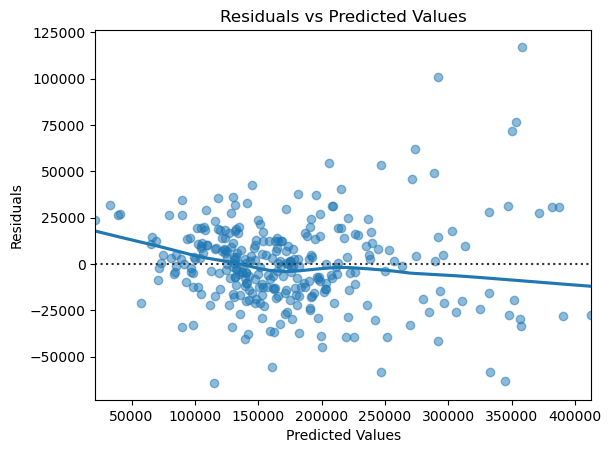

In [19]:
# Calculate residuals 
residuals = y_test - test_preds

# Plot residuals against predicted values 
sns.residplot(x=test_preds, y=residuals, lowess=True, scatter_kws={'alpha': 0.5})
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals');

In [20]:
# Make saleprice predictions on homes that were in test.csv
preds = lr.predict(df_test[['overall_qual', 'home_size', 'gr_liv_area', 'garage_area',
       'garage_cars', 'total_bsmt_sf', '1st_flr_sf', 'total_bath',
       'bsmt_qual_Ex', 'age_cond', 'year_built', 'upgrades', 'year_remod/add',
       'full_bath', 'foundation_PConc', 'garage_yr_blt', 'totrms_abvgrd',
       'mas_vnr_area', 'fireplaces', 'bsmtfin_type_1_GLQ',
       'neighborhood_NridgHt', 'exter_qual_Gd', 'bsmtfin_sf_1',
       'garage_finish_Fin', 'total_outdoor_space', 'bsmt_exposure_Gd',
       'sale_type_New', 'garage_type_Attchd', 'exterior_1st_VinylSd',
       'exterior_2nd_VinylSd', 'open_porch_sf', 'wood_deck_sf', 'lot_frontage',
       'mas_vnr_type_Stone', 'kitchen_qual_Gd', 'lot_area', 'paved_drive_Y',
       'bsmt_full_bath', 'half_bath', 'central_air_Y', 'garage_cond_TA',
       'roof_style_Hip', 'neighborhood_NoRidge', 'mas_vnr_type_BrkFace',
       'neighborhood_StoneBr', 'electrical_SBrkr', 'ms_zoning_RM',
       'bsmt_exposure_No', 'lot_shape_Reg', 'heating_qc_TA',
       'foundation_CBlock', 'garage_type_Detchd', 'mas_vnr_type_None',
       'garage_finish_Unf', 'bsmt_qual_TA', 'kitchen_qual_TA',
       'exter_qual_TA']])

# Create saleprice colum in df_test
df_test['saleprice'] = preds

# Create dataframe with only ID and saleprice columns from df_test
lr_submission_v2 = df_test[['id', 'saleprice']]

# Set Index to Id
lr_submission_v2.set_index('id', inplace=True) 

# Save submission
lr_submission_v2.to_csv('../submission/mlr_submission_v2.csv')

### [Model 3]: Column features that have a correlation coefficient equal to or greater than 0.15/-0.15 with `saleprice`

The model 3 is built using column features that have a correlation coefficient equal to or greater than 0.15/-0.15 with the `saleprice`. The model achieved a R-squared score of 88% in training data and 91.4% in testing data. The RMSE value was $21,917. The cross-validation scores range from 0.80-0.90, suggesting that the model is consistent in its performance. Overall, model 3 appears to perform best. 

In [21]:
#  Select columns that have equal or more than 15%/15% correlation to 'saleprice'
df_train_corr_15 = df_train_corr.loc[
    (df_train_corr['saleprice'] >= 0.15) | (df_train_corr['saleprice'] <= -0.15)]

# Create features matrix (X) and target vector (y)
df_train_corr_15.index

Index(['saleprice', 'overall_qual', 'home_size', 'gr_liv_area', 'garage_area',
       'garage_cars', 'total_bsmt_sf', '1st_flr_sf', 'total_bath',
       'bsmt_qual_Ex', 'age_cond', 'year_built', 'upgrades', 'year_remod/add',
       'full_bath', 'foundation_PConc', 'garage_yr_blt', 'totrms_abvgrd',
       'mas_vnr_area', 'fireplaces', 'bsmtfin_type_1_GLQ',
       'neighborhood_NridgHt', 'exter_qual_Gd', 'bsmtfin_sf_1',
       'garage_finish_Fin', 'total_outdoor_space', 'bsmt_exposure_Gd',
       'sale_type_New', 'garage_type_Attchd', 'exterior_1st_VinylSd',
       'exterior_2nd_VinylSd', 'open_porch_sf', 'wood_deck_sf', 'lot_frontage',
       'mas_vnr_type_Stone', 'kitchen_qual_Gd', 'lot_area', 'paved_drive_Y',
       'bsmt_full_bath', 'half_bath', 'central_air_Y', 'garage_cond_TA',
       'roof_style_Hip', 'neighborhood_NoRidge', 'mas_vnr_type_BrkFace',
       'neighborhood_StoneBr', 'electrical_SBrkr', 'garage_qual_TA',
       '2nd_flr_sf', 'ms_zoning_RL', 'bsmt_qual_Gd', 'garage_type

In [22]:
# Create X and y
X = df_train[['overall_qual', 'home_size', 'gr_liv_area', 'garage_area',
       'garage_cars', 'total_bsmt_sf', '1st_flr_sf', 'total_bath',
       'bsmt_qual_Ex', 'age_cond', 'year_built', 'upgrades', 'year_remod/add',
       'full_bath', 'foundation_PConc', 'garage_yr_blt', 'totrms_abvgrd',
       'mas_vnr_area', 'fireplaces', 'bsmtfin_type_1_GLQ',
       'neighborhood_NridgHt', 'exter_qual_Gd', 'bsmtfin_sf_1',
       'garage_finish_Fin', 'total_outdoor_space', 'bsmt_exposure_Gd',
       'sale_type_New', 'garage_type_Attchd', 'exterior_1st_VinylSd',
       'exterior_2nd_VinylSd', 'open_porch_sf', 'wood_deck_sf', 'lot_frontage',
       'mas_vnr_type_Stone', 'kitchen_qual_Gd', 'lot_area', 'paved_drive_Y',
       'bsmt_full_bath', 'half_bath', 'central_air_Y', 'garage_cond_TA',
       'roof_style_Hip', 'neighborhood_NoRidge', 'mas_vnr_type_BrkFace',
       'neighborhood_StoneBr', 'electrical_SBrkr', 'garage_qual_TA',
       '2nd_flr_sf', 'ms_zoning_RL', 'bsmt_qual_Gd', 'garage_type_BuiltIn',
       'land_contour_HLS', 'house_style_2Story', 'bsmt_unf_sf',
       'garage_finish_RFn', 'exterior_1st_CemntBd', 'lot_config_CulDSac',
       'exterior_2nd_CmentBd', 'neighborhood_Somerst', 'bsmtfin_type_1_Rec',
       'kitchen_qual_Fa', 'exter_cond_Fa', 'bsmt_qual_Fa', 'garage_qual_Fa',
       'exterior_2nd_Wd Sdng', 'neighborhood_Edwards', 'neighborhood_IDOTRR',
       'neighborhood_NAmes', 'exterior_1st_Wd Sdng', 'neighborhood_OldTown',
       'sale_type_WD ', 'roof_style_Gable', 'ms_zoning_RM', 'bsmt_exposure_No',
       'lot_shape_Reg', 'heating_qc_TA', 'foundation_CBlock',
       'garage_type_Detchd', 'mas_vnr_type_None', 'garage_finish_Unf',
       'bsmt_qual_TA', 'kitchen_qual_TA', 'exter_qual_TA']]
y = df_train['saleprice']

In [23]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=123)   

In [24]:
#Instantiate and fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
# Calculate r2 score
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

# Predict the values using test data 
test_preds = lr.predict(X_test)
# Calculate root mean squared error (RMSE) - Test
rmse = mean_squared_error(y_test, test_preds, squared=False)

# Cross Validation
scores = cross_val_score(lr, X, y, cv=5)

print(f"Model 3")
print(f"Column features that have a correlation coefficient equal to or greater than 0.15/-0.15 with saleprice")
print(f"----------")
print(f"Training R-Squared Score: {round(train_score, 3)}")
print(f"Test R-Squared Score: {round(test_score, 3)}")
print(f"RMSE: {round(rmse, 3)}")
print(f"Cross-Validation Score: {scores}")

Model 3
Column features that have a correlation coefficient equal to or greater than 0.15/-0.15 with saleprice
----------
Training R-Squared Score: 0.88
Test R-Squared Score: 0.914
RMSE: 21917.628
Cross-Validation Score: [0.88994358 0.89644743 0.79762495 0.88649009 0.83895733]


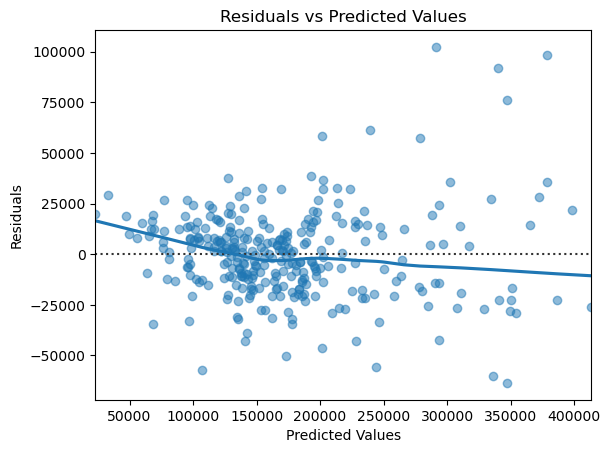

In [26]:
# Calculate residuals 
residuals = y_test - test_preds

# Plot residuals against predicted values 
sns.residplot(x=test_preds, y=residuals, lowess=True, scatter_kws={'alpha': 0.5})
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals');

In [27]:
# Make saleprice predictions on homes that were in test.csv
preds = lr.predict(df_test[['overall_qual', 'home_size', 'gr_liv_area', 'garage_area',
       'garage_cars', 'total_bsmt_sf', '1st_flr_sf', 'total_bath',
       'bsmt_qual_Ex', 'age_cond', 'year_built', 'upgrades', 'year_remod/add',
       'full_bath', 'foundation_PConc', 'garage_yr_blt', 'totrms_abvgrd',
       'mas_vnr_area', 'fireplaces', 'bsmtfin_type_1_GLQ',
       'neighborhood_NridgHt', 'exter_qual_Gd', 'bsmtfin_sf_1',
       'garage_finish_Fin', 'total_outdoor_space', 'bsmt_exposure_Gd',
       'sale_type_New', 'garage_type_Attchd', 'exterior_1st_VinylSd',
       'exterior_2nd_VinylSd', 'open_porch_sf', 'wood_deck_sf', 'lot_frontage',
       'mas_vnr_type_Stone', 'kitchen_qual_Gd', 'lot_area', 'paved_drive_Y',
       'bsmt_full_bath', 'half_bath', 'central_air_Y', 'garage_cond_TA',
       'roof_style_Hip', 'neighborhood_NoRidge', 'mas_vnr_type_BrkFace',
       'neighborhood_StoneBr', 'electrical_SBrkr', 'garage_qual_TA',
       '2nd_flr_sf', 'ms_zoning_RL', 'bsmt_qual_Gd', 'garage_type_BuiltIn',
       'land_contour_HLS', 'house_style_2Story', 'bsmt_unf_sf',
       'garage_finish_RFn', 'exterior_1st_CemntBd', 'lot_config_CulDSac',
       'exterior_2nd_CmentBd', 'neighborhood_Somerst', 'bsmtfin_type_1_Rec',
       'kitchen_qual_Fa', 'exter_cond_Fa', 'bsmt_qual_Fa', 'garage_qual_Fa',
       'exterior_2nd_Wd Sdng', 'neighborhood_Edwards', 'neighborhood_IDOTRR',
       'neighborhood_NAmes', 'exterior_1st_Wd Sdng', 'neighborhood_OldTown',
       'sale_type_WD ', 'roof_style_Gable', 'ms_zoning_RM', 'bsmt_exposure_No',
       'lot_shape_Reg', 'heating_qc_TA', 'foundation_CBlock',
       'garage_type_Detchd', 'mas_vnr_type_None', 'garage_finish_Unf',
       'bsmt_qual_TA', 'kitchen_qual_TA', 'exter_qual_TA']])

# Create saleprice colum in df_test
df_test['saleprice'] = preds 

# Create dataframe with only ID and saleprice columns from df_test
lr_submission_v3 = df_test[['id', 'saleprice']]

# Set Index to Id
lr_submission_v3.set_index('id', inplace=True) 

# Save submission
lr_submission_v3.to_csv('../submission/mlr_submission_v3.csv')

### [Model 4]: Build a Lasso model (scaled & unscaled), using column features that have a correlation coefficient equal to or greater than 0.15/-0.15 with `saleprice`

#### Lasso Model - Unscaled

In [28]:
#Instantiate and fit the model
lasso = Lasso(alpha=10, max_iter=100_000)
lasso.fit(X_train, y_train)

Lasso(alpha=10, max_iter=100000)

In [29]:
# Calculate r2 score
lasso_train_score = lasso.score(X_train, y_train)
lasso_test_score = lasso.score(X_test, y_test)

# Predict the values using test data 
lasso_test_preds = lasso.predict(X_test)
# Calculate root mean squared error (RMSE) - Test
lasso_rmse = mean_squared_error(y_test, lasso_test_preds, squared=False)

# Cross Validation
lasso_scores = cross_val_score(lasso, X, y, cv=5)

print(f"Lasso Model - unscaled")
print(f"----------")
print(f"Training R-Squared Score: {round(lasso.score(X_train, y_train), 3)}")
print(f"Test R-Squared Score: {round(lasso.score(X_test, y_test), 3)}")
print(f"RMSE: {round(lasso_rmse, 3)}")
print(f"Cross-Validation Score: {lasso_scores}")

/Users/ayakohomma/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.654e+10, tolerance: 1.027e+09
  model = cd_fast.enet_coordinate_descent(
/Users/ayakohomma/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.306e+10, tolerance: 1.024e+09
  model = cd_fast.enet_coordinate_descent(


Lasso Model - unscaled
----------
Training R-Squared Score: 0.88
Test R-Squared Score: 0.915
RMSE: 21780.733
Cross-Validation Score: [0.89048248 0.89802064 0.79760353 0.8879321  0.83845654]


#### Lasso Model - Scaled

In [30]:
# Scale model 
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [31]:
#Instantiate and fit the model
lasso2 = Lasso(alpha=10, max_iter=100_000)
lasso2.fit(Z_train, y_train)

Lasso(alpha=10, max_iter=100000)

In [32]:
# Calculate r2 score
lasso2_train_score = lasso2.score(Z_train, y_train)
lasso2_test_score = lasso2.score(Z_test, y_test)

# Predict the values using test data 
lasso2_test_preds = lasso2.predict(Z_test)
# Calculate root mean squared error (RMSE) - Test
lasso2_rmse = mean_squared_error(y_test, lasso2_test_preds, squared=False)

# Cross Validation
lasso2_scores = cross_val_score(lasso2, X, y, cv=5)

print(f"Lasso Model - Scaled")
print(f"----------")
print(f"Training R-Squared Score: {round(lasso2.score(Z_train, y_train), 3)}")
print(f"Test R-Squared Score: {round(lasso2.score(Z_test, y_test), 3)}")
print(f"RMSE: {round(lasso2_rmse, 3)}")
print(f"Cross-Validation Score: {lasso2_scores}")

/Users/ayakohomma/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.654e+10, tolerance: 1.027e+09
  model = cd_fast.enet_coordinate_descent(
/Users/ayakohomma/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.306e+10, tolerance: 1.024e+09
  model = cd_fast.enet_coordinate_descent(


Lasso Model - Scaled
----------
Training R-Squared Score: 0.88
Test R-Squared Score: 0.914
RMSE: 21858.104
Cross-Validation Score: [0.89048248 0.89802064 0.79760353 0.8879321  0.83845654]


### [Model 5]: Build a Ridge model (scaled & unscaled), using column features that have a correlation coefficient equal to or greater than 0.15/-0.15 with `saleprice`

#### Ridge Model - Unscaled

In [33]:
#Instantiate and fit the model
ridge = Ridge(alpha=1, max_iter=100_000)
ridge.fit(X_train, y_train)

Ridge(alpha=1, max_iter=100000)

In [34]:
# Calculate r2 score
ridge_train_score = ridge.score(X_train, y_train)
ridge_test_score = ridge.score(X_test, y_test)

# Predict the values using test data 
ridge_test_preds = ridge.predict(X_test)
# Calculate root mean squared error (RMSE) - Test
ridge_rmse = mean_squared_error(y_test, ridge_test_preds, squared=False)

# Cross Validation
ridge_scores = cross_val_score(ridge, X, y, cv=5)

print(f"Ridge Model")
print(f"----------")
print(f"Training R-Squared Score: {round(ridge.score(X_train, y_train), 3)}")
print(f"Test R-Squared Score: {round(ridge.score(X_test, y_test), 3)}")
print(f"RMSE: {round(ridge_rmse, 3)}")
print(f"Cross-Validation Score: {ridge_scores}")

Ridge Model
----------
Training R-Squared Score: 0.88
Test R-Squared Score: 0.915
RMSE: 21770.103
Cross-Validation Score: [0.89022108 0.89831518 0.79715297 0.88839364 0.8384775 ]


#### Ridge Model - Scaled

In [35]:
# Scale model 
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [36]:
#Instantiate and fit the model
ridge2 = Ridge(alpha=1, max_iter=100_000)
ridge2.fit(Z_train, y_train)

Ridge(alpha=1, max_iter=100000)

In [37]:
# Calculate r2 score
ridge2_train_score = ridge2.score(Z_train, y_train)
ridge2_test_score = ridge2.score(Z_test, y_test)

# Predict the values using test data 
ridge2_test_preds = ridge2.predict(X_test)
# Calculate root mean squared error (RMSE) - Test
ridge2_rmse = mean_squared_error(y_test, ridge2_test_preds, squared=False)

# Cross Validation
ridge2_scores = cross_val_score(ridge2, X, y, cv=5)

print(f"Ridge Model - Scaled")
print(f"----------")
print(f"Training R-Squared Score: {round(ridge2.score(Z_train, y_train), 3)}")
print(f"Test R-Squared Score: {round(ridge2.score(Z_test, y_test), 3)}")
print(f"RMSE: {round(ridge2_rmse, 3)}")
print(f"Cross-Validation Score: {ridge2_scores}")

Ridge Model - Scaled
----------
Training R-Squared Score: 0.879
Test R-Squared Score: 0.912
RMSE: 82248223.907
Cross-Validation Score: [0.89022108 0.89831518 0.79715297 0.88839364 0.8384775 ]


/Users/ayakohomma/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


## Evaluation 

Here are the scores and metrics for different models: 

|Model Type|Features|Training Score|Test Score|RMSE|Cross_Validation Score (cv=5)|
|--|--|--|--|--|--|
|Model 1 - OLS|Column features that have a correlation coefficient equal to or greater than 0.5/-0.5 with `saleprice`| 0.821|0.895|24241.895|0.83893082, 0.87857168, 0.74104123, 0.86567608, 0.78168124|
|Model 2 - OLS|Column features that have a correlation coefficient equal to or greater than 0.25/-0.25 with `saleprice`|0.868|0.904|23088.501|0.8868733, 0.89055275, 0.77662003, 0.89321447, 0.82532272|
|Model 3 - OLS|Column features that have a correlation coefficient equal to or greater than 0.15/-0.15 with `saleprice`|0.88|0.914|21917.108|0.88994358, 0.89644743, 0.79762495, 0.88649009, 0.83895733|
|Model 4 - Lasso (Unscaled)|Column features that have a correlation coefficient equal to or greater than 0.15/-0.15 with `saleprice`|0.88|0.915|21780.733|0.89048248 0.89802064 0.79760353 0.8879321  0.83845654|
|Model 4 - Lasso (Scaled)|Column features that have a correlation coefficient equal to or greater than 0.15/-0.15 with `saleprice`|0.88|0.914|21858.104|0.89048248 0.89802064 0.79760353 0.8879321  0.83845654|
|Model 5 - Ridge (Unscaled)|Column features that have a correlation coefficient equal to or greater than 0.15/-0.15 with `saleprice`|0.88|0.915|21770.103|0.89022108 0.89831518 0.79715297 0.88839364 0.8384775|
|Model 5 - Ridge (Scaled)|Column features that have a correlation coefficient equal to or greater than 0.15/-0.15 with `saleprice`|0.879|0.912|82248223.907|0.89022108 0.89831518 0.79715297 0.88839364 0.8384775|

The above table shows that Model 3 - OLS with features having correlation coefficient 0.15/-0.15 or greater - performed the best among all the models. This model achieved the highest test score of 0.914, the lowest RMSE of 21917.108, and a good training score of 0.88. The cross-validation score also shows good consistency in performance across folds.

Also, another unique observations include the fact that the Lasso model's performance remained the same with or without scaling, while the performance of the Ridge model degraded significantly with scaling. 

Additionally, the correlation threshold used for feature selection affected model performance, with Model 2 - OLS with features having correlation coefficient 0.25/-0.25 or greater, outperforming Model 1 - OLS with features having correlation coefficient 0.5/-0.5 or greater.

## Conclusion & Recommendations

#### Conclusion 

- Based on our analysis, we have developed a model that can accurately predict home prices in Ames, IA, with an R-squared score of 0.914. 
- Our analysis identified several key factors that have a significant influence on the market value of homes in the area, including the overall quality, the garage area, and the year the house was built. 
- By taking these factors into account, our model can provide local real estate agents with more accurate pricing information, enabling them to offer more informed guidance to their clients. 

#### Recommendations

Here are some suggestion for improving the current model: 
- Feature engineering: Since there are some features related to `garage`, a new interaction column could be created by combining the features related to garage. 
- Data cleaning: Different approach in handling missing values and outliers could be tested. 
- Model selection: Other models such as Random Forest, Gradient Boosting or Neural Networks could be tested. 